Before Starting:
As in other projects, your upvotes really mean a lot to me because it tells me that Kagglers are interested in the work I am proving to you guys. So I will appreciate if you could upvote this kernel if you enjoy the work I do. Looking to share some insights with Kagglers in the comment section. Also, if updates take longer than usual it is because of work at school nevertheless, I'll try to bring more interesting updates with regards to this project. Hope you enjoy the analysis!

# **Cost of Treatment of Patient Prediction Based on Medical Cost Personal Datasets**

# **Part 1 - DEFINE**

---Step1.Define the problem----->
Accurately Predict the insurance costs, based on medical cost personal dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

# **Part 2 - DISCOVER**
----Step2.Load Dataset---->Check Head, info and describe ,  shape of dataset by query

In [3]:
df= pd.read_csv('insurance.csv')

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print('Number of rows and columns in the data set: ',df.shape)

Number of rows and columns in the data set:  (1338, 7)


Now we have imported dataset. When we look at the shape of dataset it has return as (1338,7).So there are  m=1338  training exaple and  n=7  independent variable. The target variable here is charges and remaining six variables such as age, sex, bmi, children, smoker, region are independent variable.

----Step3.Clean Dataset---

In [8]:
# Check for null count column wise
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---Step4.Explore the Data (EDA)--

a.Visualizing the Charges data Target Variable by using distplot


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


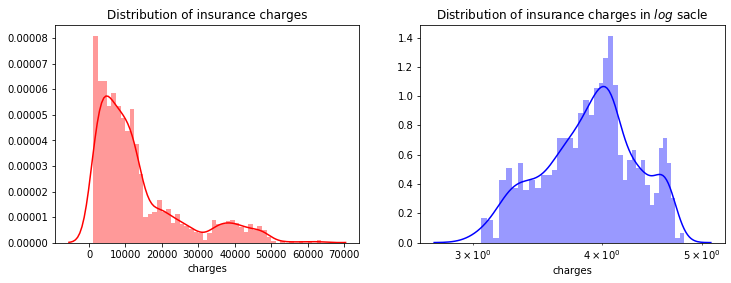

In [9]:
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')
plt.show()


b.Visualizing categorical data by using bar plot

- sex
- smoker
- region

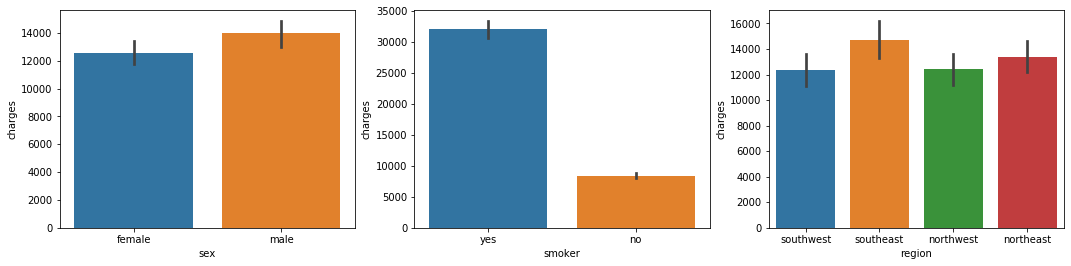

In [10]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='sex', y='charges', data=df)
plt.subplot(132)
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.barplot(x='region', y='charges', data=df)
plt.show()

c.Visualizing Numerical data by using pairplot
- age
- bmi
- children
- charges

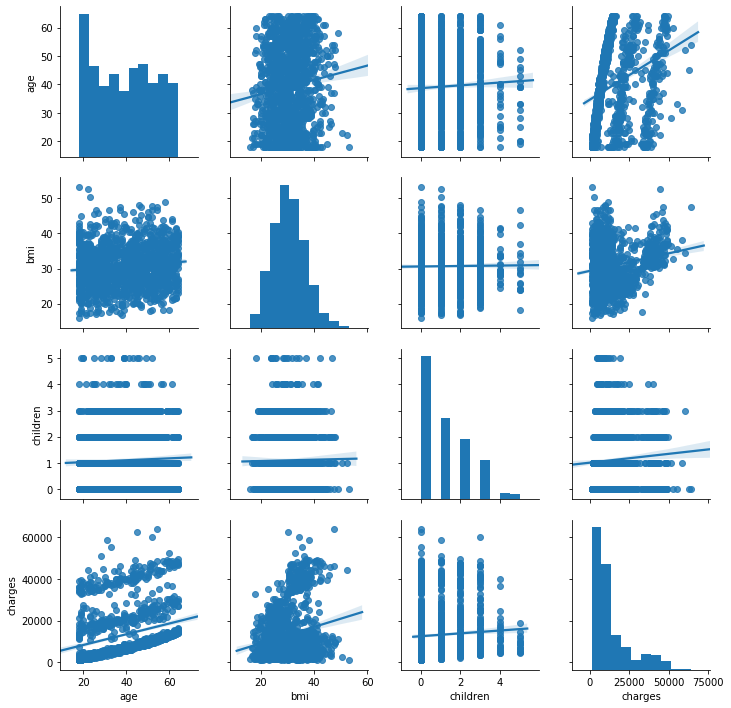

In [11]:
sns.pairplot(df,kind="reg")

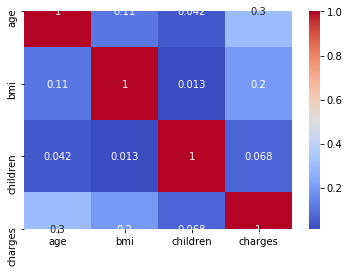

In [12]:

#Plot a heatmap and look at the corelation
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

--Step5.Label Encoding for Catogorical data---

**Label encoding** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.



In [13]:
# Let us map the variables with 2 levels to 0 and 1
df['sex']=df['sex'].map({'male':1, 'female':0})
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [14]:
# Assigning dummy variables to remaining categorical variable- region
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# Part 3 DEVELOP
# **Train Test split**

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # Independet variable
y = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.7958786376014413


**Now lets add Polynmial Feature and look at the result**

In [18]:
X = df.drop(['charges','region_northwest','region_southeast','region_southwest'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147235
